In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [6]:
# Reading glass.xlsx file as pandas dataframe

file = pd.ExcelFile(r"C:\Users\DELL\OneDrive\Desktop\Data Science assignment\Random Forest\Random Forest\glass.xlsx")
glass = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'glass')         # Main dataframe sheet

In [7]:
glass

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [8]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
# Check for null values
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [15]:
# Check for duplicates
df.duplicated().any()

False

In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Setting up features and targets
target = df[['Type']]
features = df.drop('Type', axis=1)

## Data Visualization:

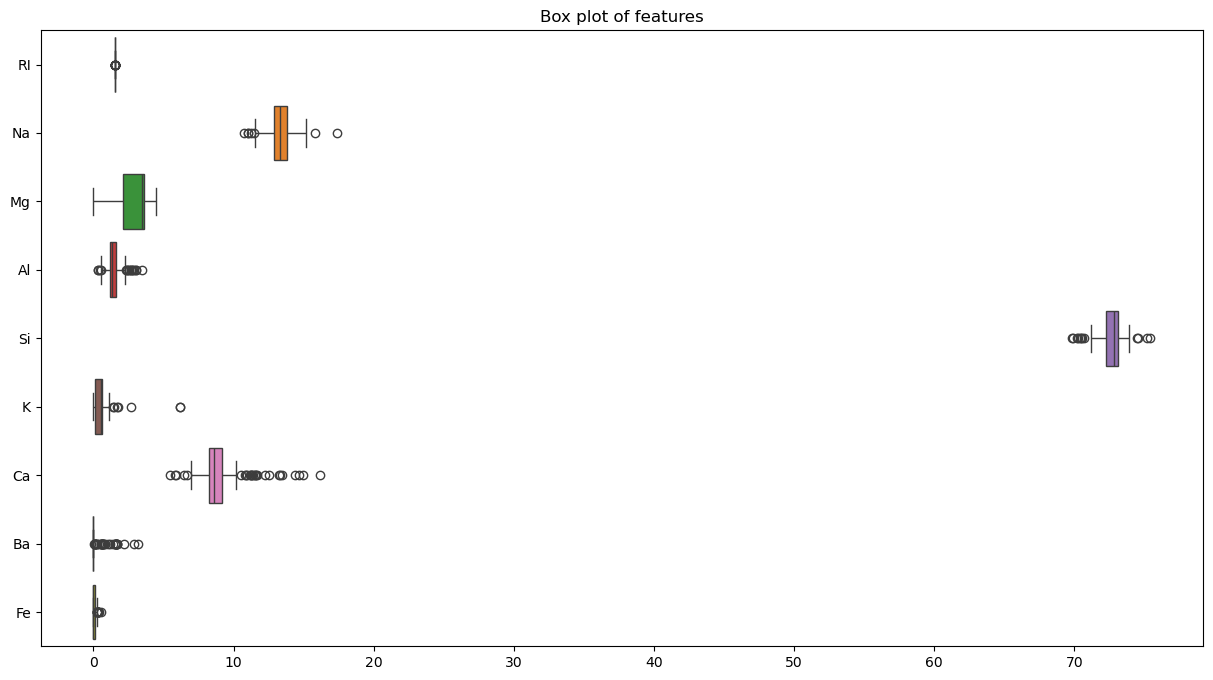

In [18]:
# box plot of features
plt.figure(figsize=(15,8))
sns.boxplot(data=features, orient='h')
plt.title('Box plot of features')
plt.show()

## Removing outliers

In [19]:
df.loc[df['Ca']>df['Ca'].quantile(0.99),df['Ca']]=df['Ca'].quantile(0.99)

{'whiskers': [<matplotlib.lines.Line2D at 0x1483997aea0>,
 'caps': [<matplotlib.lines.Line2D at 0x14839bf2de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x148399806b0>],
 'medians': [<matplotlib.lines.Line2D at 0x14839bf1be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14839bf2ba0>],
 'means': []}

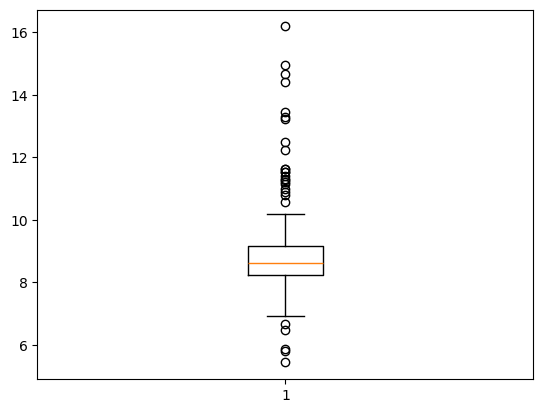

In [20]:
plt.boxplot(df['Ca'])

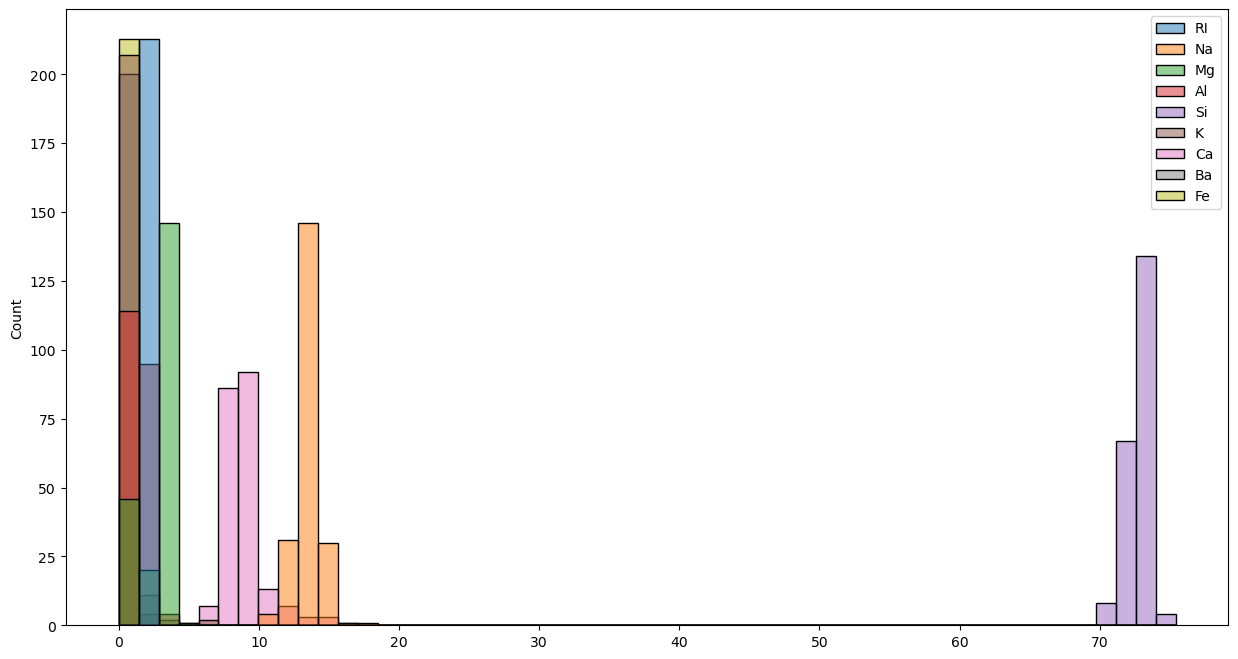

In [21]:
# Histogram plot
plt.figure(figsize=(15,8))
sns.histplot(features, kde=False)
plt.show()

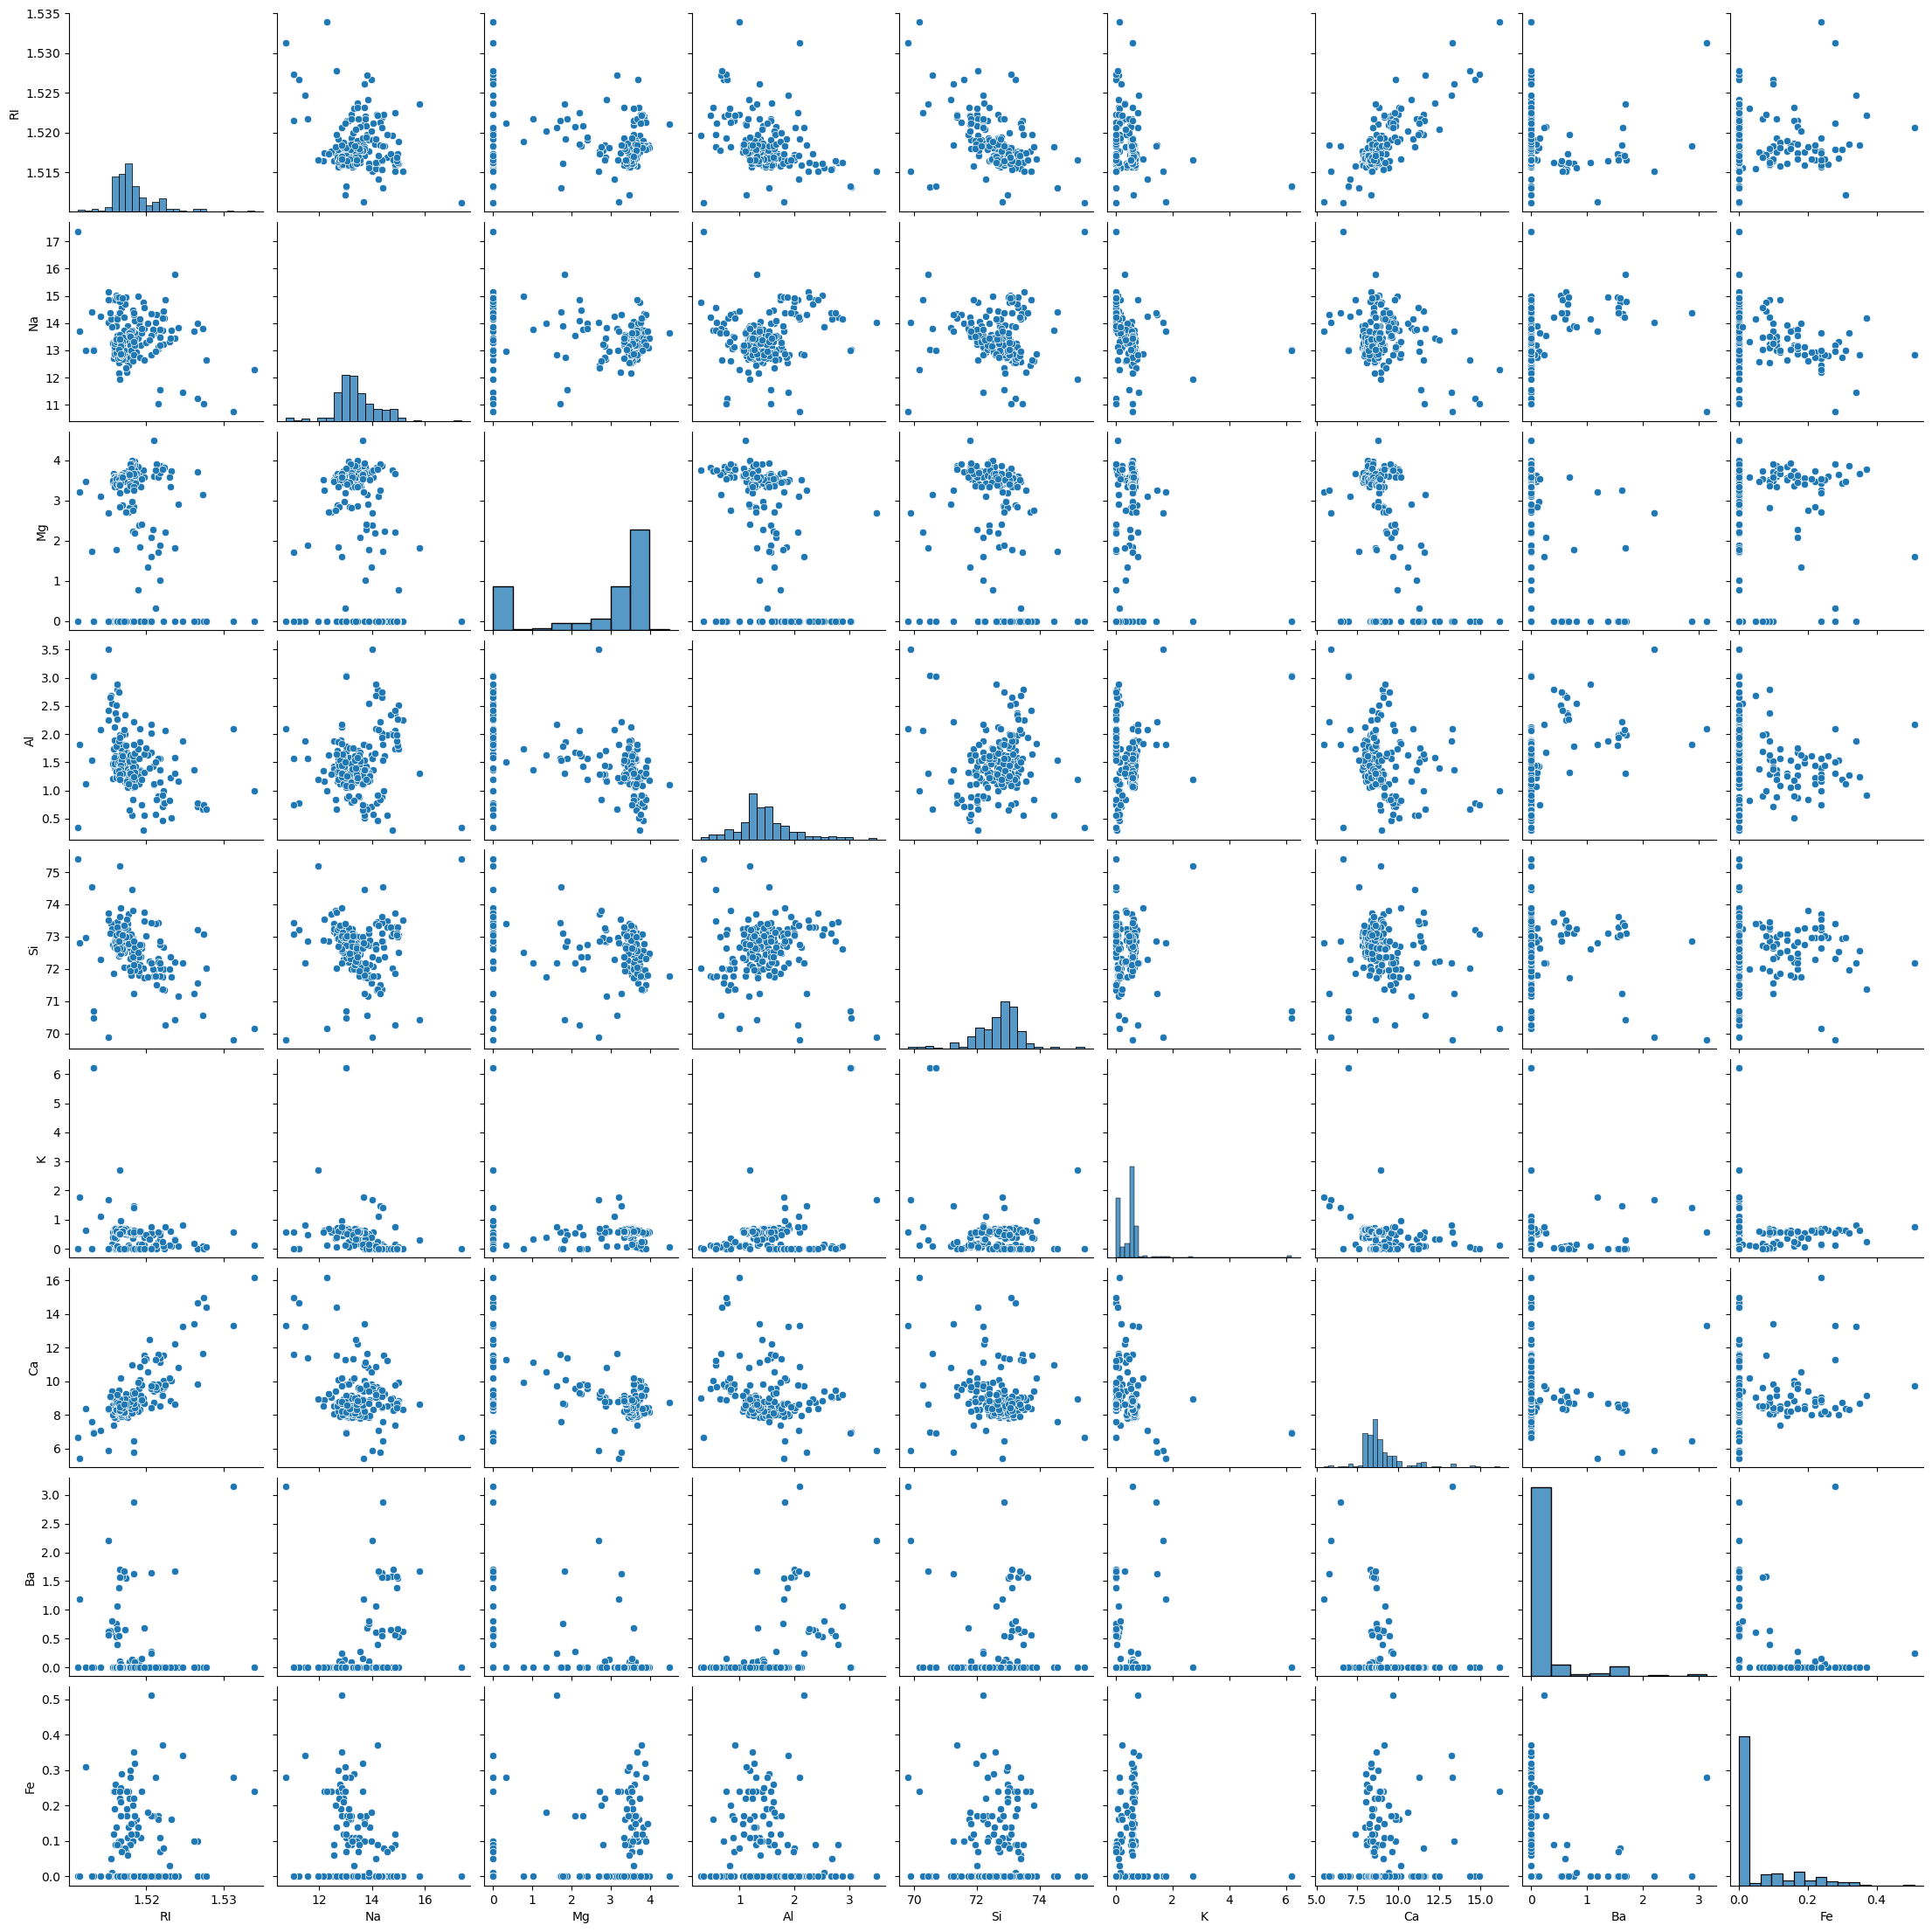

In [22]:
sns.pairplot(features)
plt.show()

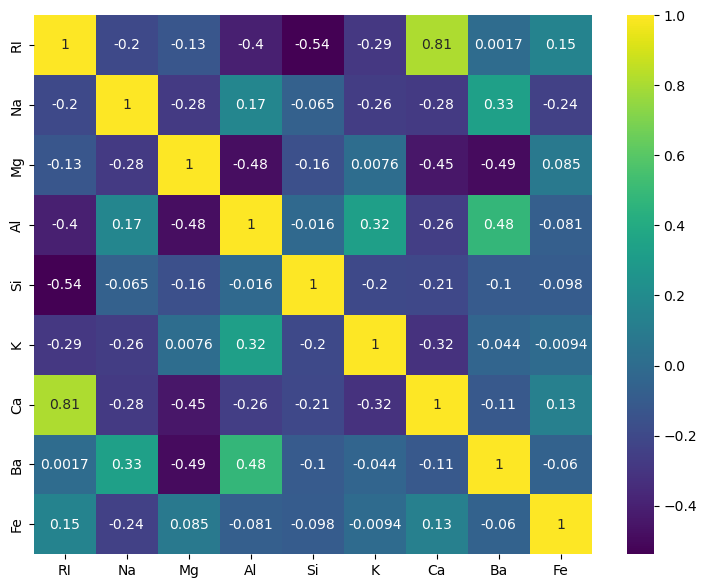

In [23]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(features.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [24]:
# Split into training and testing data
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

## Random Forest Model Implementation

In [25]:
# Initiating Random Forest Classifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,bootstrap=True)

In [26]:
rfc.fit(x_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50)

In [27]:
y_pred = rfc.predict(x_test)

In [28]:
# Accuracy score

accuracy_score(y_test, y_pred)

0.7962962962962963

In [29]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           2       0.80      0.84      0.82        19
           3       0.50      0.25      0.33         4
           5       0.83      0.62      0.71         8
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.80        54
   macro avg       0.79      0.71      0.73        54
weighted avg       0.79      0.80      0.78        54



## Bagging and Boosting Methods

In [30]:
# Applying bagging method

from sklearn.tree import DecisionTreeClassifier
bag_class= BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,bootstrap=True)

In [31]:
bag_class.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [32]:
y_pred=bag_class.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7407407407407407

In [34]:
# Applying Adaboost method

from sklearn.ensemble import AdaBoostClassifier

ada_boost= AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50)

In [35]:
ada_boost.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [36]:
y_pred= ada_boost.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.6296296296296297

In [38]:
# Applying gradient boost method

from sklearn.ensemble import GradientBoostingClassifier

grad_boost= GradientBoostingClassifier(n_estimators=50, learning_rate=0.3,max_depth=2)

In [39]:
grad_boost.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=50)

In [40]:
y_pred= grad_boost.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.7037037037037037

In [ ]:
## 
Accuracy heirarchy is as follows

Adaboosting method < Gradient boosting method  < Bagging method< Random Forest classifier

 ## Interview questions
####  Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating) How it works: Bagging involves training multiple versions of the same model on different random subsets of the training data (created through bootstrapping, which is random sampling with replacement).

Model Independence: Each model in the ensemble is trained independently.

Goal: The main goal is to reduce variance and prevent overfitting.

Common Algorithms: Random Forests is a well-known example of a bagging method.

Boosting How it works: Boosting trains models sequentially, each new model trying to correct the errors made by the previous models.

Model Dependence: Each model in the sequence is dependent on the previous models.

Goal: The main goal is to reduce bias and improve accuracy.

Common Algorithms: AdaBoost, Gradient Boosting Machines (GBM), and XGBoost are popular boosting methods.

#### Key Differences Training Method:

Bagging: Models are trained in parallel, independently.

Boosting: Models are trained sequentially, each focusing on the errors of its predecessor.

##### Purpose:

Bagging: Reduces variance by averaging multiple models.

Boosting: Reduces bias by focusing on errors through sequential improvement.

##### Error Handling:

Bagging: Each model works on a different subset of data, so errors are less correlated.

Boosting: Each new model is trained to handle the errors of previous models, hence focuses more on difficult cases.

##### Explain how to handle imbalance in the data
Here are a few methods for tackling imbalanced datasets:

Resampling: Adjusting the dataset to balance the classes.

Undersampling: Reduce the majority class size.

Oversampling: Increase the minority class size.

SMOTE: Generate synthetic samples for the minority class.

Choosing the Right Metrics: Using metrics that better reflect performance.

Precision-Recall Curve: Focuses on the balance between precision and recall.

F1 Score: Harmonic mean of precision and recall.

ROC-AUC: Measures model's ability to distinguish between classes.

Algorithm Selection: Using algorithms that can handle imbalance better.

Tree-based Methods: Random Forest, Gradient Boosting.

Ensemble Methods: Combining multiple models.

Class Weights: Adjusting the model to account for imbalance.

Many models (e.g., logistic regression, SVM) allow setting class weights to give more importance to the minority class.

Anomaly Detection: Treating the minority class as anomalies, useful in highly imbalanced scenarios.